<a href="https://colab.research.google.com/github/samggriffith1/FDSfE__-SGriffith-/blob/main/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install geopandas
!pip install folium
!apt install python3-rtree
!pip install pyproj

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-rtree is already the newest version (0.9.7-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [21]:
import urllib3
from bs4 import BeautifulSoup
import os
import glob
import pandas as pd
from shapely.geometry import Point, LineString
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import pyproj

In [ ]:
ct_shape = gpd.read_file ("https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=GeoJSON")

In [ ]:
ct_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ntacode      2165 non-null   object  
 1   shape_area   2165 non-null   object  
 2   ntaname      2165 non-null   object  
 3   shape_leng   2165 non-null   object  
 4   boro_name    2165 non-null   object  
 5   puma         2165 non-null   object  
 6   ct2010       2165 non-null   object  
 7   boro_code    2165 non-null   object  
 8   cdeligibil   2164 non-null   object  
 9   boro_ct2010  2165 non-null   object  
 10  ctlabel      2165 non-null   object  
 11  geometry     2165 non-null   geometry
dtypes: geometry(1), object(11)
memory usage: 203.1+ KB


In [ ]:
ct_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

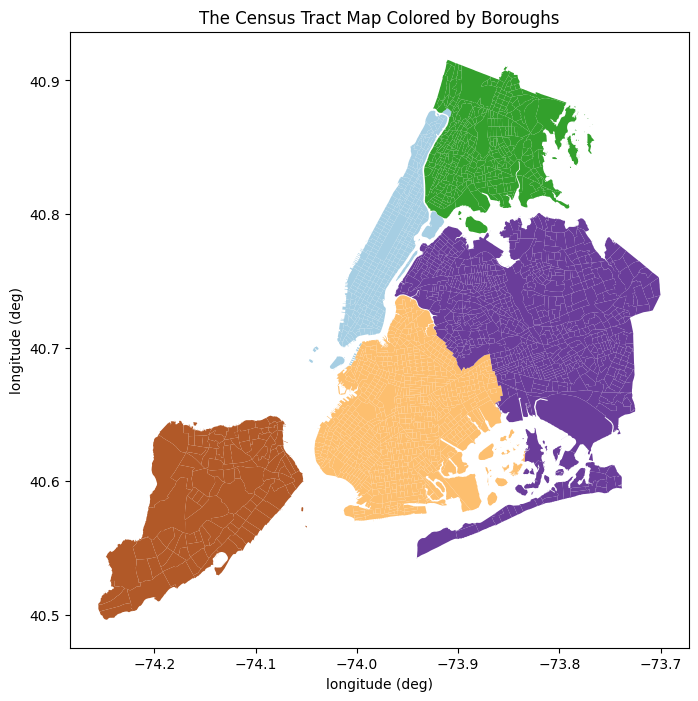

In [ ]:
f, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("longitude (deg)")
ax.set_ylabel("longitude (deg)")
ct_shape.plot(column='boro_code', alpha=1, linewidth=0.5, ax=ax, cmap='Paired')
plt.title("The Census Tract Map Colored by Boroughs");

In [28]:
ct_shape.to_crs("EPSG:2263")

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((962269.126 173705.500, 962288...."
1,MN17,1860992.68163,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((992216.539 216507.687, 992091...."
2,MN17,1864600.43538,Midtown-Midtown South,5693.03636707,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((991325.882 217001.689, 991199...."
3,MN17,1890907.25105,Midtown-Midtown South,5699.86064037,Manhattan,3807,011300,1,I,1011300,113,"MULTIPOLYGON (((988650.277 214286.402, 988517...."
4,MN40,1918144.56374,Upper East Side-Carnegie Hill,5807.97295649,Manhattan,3805,013000,1,I,1013000,130,"MULTIPOLYGON (((994920.110 221386.270, 994791...."
...,...,...,...,...,...,...,...,...,...,...,...,...
2160,BX99,33677585.3027,park-cemetery-etc-Bronx,32581.6861951,Bronx,3705,033400,2,I,2033400,334,"MULTIPOLYGON (((1020356.570 259230.819, 102034..."
2161,SI11,86234047.3011,Charleston-Richmond Valley-Tottenville,54952.0584797,Staten Island,3901,022600,5,I,5022600,226,"MULTIPOLYGON (((926730.616 142481.322, 926228...."
2162,SI11,17600970.2741,Charleston-Richmond Valley-Tottenville,31776.1517707,Staten Island,3901,024800,5,I,5024800,248,"MULTIPOLYGON (((920446.403 128476.485, 920405...."
2163,QN53,2303269.80059,Woodhaven,10367.8933957,Queens,4111,003400,4,I,4003400,34,"MULTIPOLYGON (((1025865.158 189386.026, 102562..."


In [31]:
ct_shape.geometry.area

<ipython-input-31-565826bc38ac>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ct_shape.geometry.area


0       0.000025
1       0.000018
2       0.000018
3       0.000019
4       0.000019
          ...   
2160    0.000334
2161    0.000852
2162    0.000174
2163    0.000023
2164    0.000014
Length: 2165, dtype: float64

In [32]:
ct_shape = ct_shape.to_crs("EPSG:2263")
ct_shape.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'The Census Tract Map Colored by Boroughs in US feet')

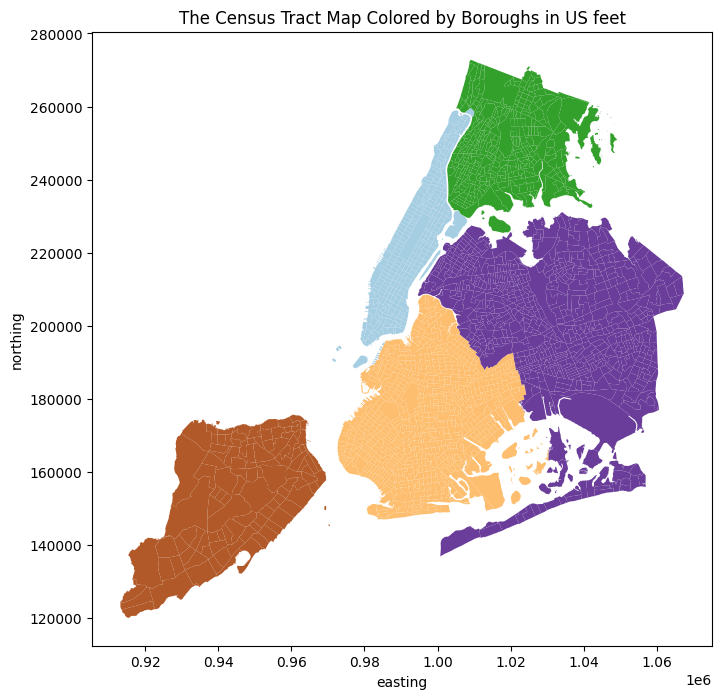

In [36]:
f, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("easting")
ax.set_ylabel("northing")
ct_shape.plot(column='boro_code', alpha=1, linewidth=0.5, ax=ax, cmap='Paired')
plt.title("The Census Tract Map Colored by Boroughs in US feet")

In [37]:
ct_shape["shape_areami2"] = ct_shape.geometry.area * 3.587e-8
ct_shape

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry,shape_areami2
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((962269.126 173705.500, 962288....",0.089568
1,MN17,1860992.68163,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((992216.539 216507.687, 992091....",0.066754
2,MN17,1864600.43538,Midtown-Midtown South,5693.03636707,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((991325.882 217001.689, 991199....",0.066883
3,MN17,1890907.25105,Midtown-Midtown South,5699.86064037,Manhattan,3807,011300,1,I,1011300,113,"MULTIPOLYGON (((988650.277 214286.402, 988517....",0.067827
4,MN40,1918144.56374,Upper East Side-Carnegie Hill,5807.97295649,Manhattan,3805,013000,1,I,1013000,130,"MULTIPOLYGON (((994920.110 221386.270, 994791....",0.068804
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,BX99,33677585.3027,park-cemetery-etc-Bronx,32581.6861951,Bronx,3705,033400,2,I,2033400,334,"MULTIPOLYGON (((1020356.570 259230.819, 102034...",1.208011
2161,SI11,86234047.3011,Charleston-Richmond Valley-Tottenville,54952.0584797,Staten Island,3901,022600,5,I,5022600,226,"MULTIPOLYGON (((926730.616 142481.322, 926228....",3.093220
2162,SI11,17600970.2741,Charleston-Richmond Valley-Tottenville,31776.1517707,Staten Island,3901,024800,5,I,5024800,248,"MULTIPOLYGON (((920446.403 128476.485, 920405....",0.631342
2163,QN53,2303269.80059,Woodhaven,10367.8933957,Queens,4111,003400,4,I,4003400,34,"MULTIPOLYGON (((1025865.158 189386.026, 102562...",0.082618


In [54]:
ct_shape.loc[0:2164,['shape_areami2', 'boro_name']]

,shape_areami2,boro_name
0,0.089568,Staten Island
1,0.066754,Manhattan
2,0.066883,Manhattan
3,0.067827,Manhattan
4,0.068804,Manhattan
...,...,...
2160,1.208011,Bronx
2161,3.093220,Staten Island
2162,0.631342,Staten Island
2163,0.082618,Queens


In [60]:
NYC_area = ct_shape['shape_areami2'].sum()

In [62]:
print ('total NYC land area: {:.0f} (mi^2)'.format(NYC_area))

total NYC land area: 302 (mi^2)
